# Interpolation
- When it is necessary to produce new data points in a specified set of data points, where the data is very reliable, it is useful to use interpolation.  Interpolation is a mathematical method that creates "splines," or piecewise functions between the given set of data points.  

## Linear Interpolation
- A linear function joins each pariwise set of data points, from left to right.
- Given points $x_0$, $x_1$, $\cdots$, $x_i$ and $f_0 = f(x_0)$, $f_1 = f(x_1)$, $\ldots$, $f_i = f(x_i)$, where the interpolated $x$-point is such, $x_i < x < x_{i+1}$
- We can derive the linear interpolation at $x$ (recognizable as slope-intercept equation) as:<br />
$y(x) = y_i + (x-x_i)\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$
- Advantage is speed and simplicity



In [19]:
import scipy.interpolate
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Use scipy built in interpolation package on univariate data set where x and y are arrays of values 
# (reliable x and y points, respectively).  Can specify the "kind" of interpolation as "linear" (is defualt)
# Note, arrays should not contain NaN values

# "reliable" dataset
x = np.arange(0, 10)
y = 1/np.exp(x)

# create linear piecewise functions using dataset
f = scipy.interpolate.interp1d(x, y)

# create interpolated dataset to graph against original data points
x_intp = np.arange(0, 9, 0.1)
y_intp = f(x_intp)


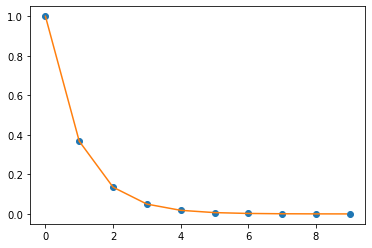

In [14]:
# plot both original dataset and splines
plt.plot(x, y, 'o', x_intp, y_intp, '-')
plt.show()

In [16]:
# show example of interpolated y-value from function above
print(f(1.5))

0.2516073622040275


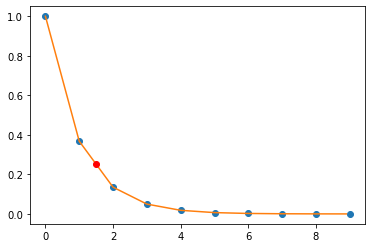

In [18]:
# add example interpolated y-value to our graph in red
plt.plot(x, y, 'o', x_intp, y_intp, '-')
plt.plot(1.5, f(1.5), 'ro')
plt.show()

### Pitfalls of Linear Interpolation
- Not realistic for most real world data sets (most data has more nuance than can be represented in a simple linear relationship)
- Least accurate

## Cubic Spline Interpolation
- In comparison to linear interpolation, the splines of cubic spline interpolation are cubic peicewise polynomials with the following format: <br />
$a_1x^3+b_1x^2+c_1x+d_1 = y_1 \\
a_2x^3+b_2x^2+c_2x+d_2 = y_2\\
\dots\\ 
a_{n-1}x^3+b_{n-1}x^2+c_{n-1}x+d_{n-1} = y_{n-1}$
- Creating a system of $4(n-1)$ unknowns with $n$ data points
- Each spline joins two pariwise consecutive data points, $x_i$ and $x_{x+1}$
- Must also satisfy the following conditions:
  - Must pass through all data points (giving $2(n-1)$ equations)
  - Frist derivatives at interior nodes must be equal (midpoint to two adjacent splines) (gives $n-2$ equations)
  - Second derivatives at interior nodes must be equal (midpoint to two adjacent splines) (gives $n-2$ equations)
  - Must specify boundary conditions (typically clamped or natural) (gives 2 equations)
- 

In [27]:
# Use scipy built in interpolation package on univariate data set where x and y are arrays of values 
# (reliable x and y points, respectively).
# Note, arrays should not contain NaN values

# "reliable" dataset
x = np.array([0, 1, 2, 3, 4])
y = np.array([21, 24, 24, 18, 16])
arr = np.arange(0, 4, 0.01)

# create cubic polynomial piecewise functions using dataset specifying second derivatives equal zero at endpoints (natural)
f = scipy.interpolate.CubicSpline(x, y, bc_type=((2, 0.0), (2, 0.0)))

# create interpolated dataset to graph against original data points
x_intp = np.arange(0, 4, 0.01)
y_intp = f(x_intp)


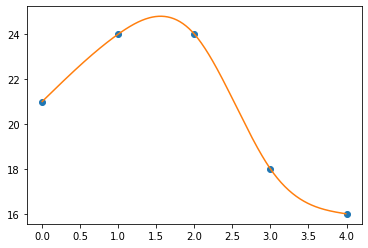

In [28]:
# plot both original dataset and splines
plt.plot(x, y, 'o', x_intp, y_intp, '-')
plt.show()

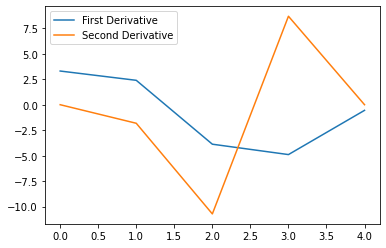

In [31]:
# Show derivatives to satisfy constraints
plt.plot(x, f(x, 1), label="First Derivative")
plt.plot(x, f(x, 2), label="Second Derivative")
plt.legend()
plt.show()